
# Project: No-show Appointments Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project will use the information from one hundred thousand medical appointments in Brazil to analyze some trends and factors from patients who did not show up in their appointment. Therefore, these factors can be used to predict whether a patient would show up in their medical appointment. 

#### Factors will be used:
<br>- Gender
<br>- Age
<br>- Message reminder

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [129]:
# Load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [130]:
# Inspect data shape
df.shape

(110527, 14)

In [131]:
# Inspect data informatione 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [132]:
# Inspect data statistic
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [133]:
# Check for duplication
sum(df.duplicated())

0

No duplicated value found

In [134]:
# Check for Null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No null value found

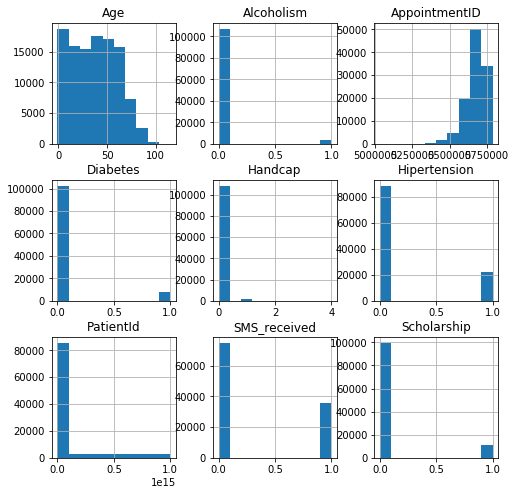

In [135]:
# Data inspected in visual
df.hist(figsize=(8,8));

### Data Cleaning 

In [136]:
# Drop columns will not be used for this project
df.drop(['PatientId','AppointmentID','Scholarship','ScheduledDay','AppointmentDay','Neighbourhood'], axis=1, inplace=True)


In [137]:
#Rename columns to lower case
df.rename(columns = lambda x: x.strip().lower().replace('-',"_"),inplace=True)
df.head()

,gender,age,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,1,0,0,0,0,No
1,M,56,0,0,0,0,0,No
2,F,62,0,0,0,0,0,No
3,F,8,0,0,0,0,0,No
4,F,56,1,1,0,0,0,No


In [138]:
#Change columns' name that were misspelled 
df.rename(columns={'handcap':'handicap','hipertension':'hypertension'},inplace=True)

In [139]:
#Change data type of no_show column to number
df['no_show'].replace({'No':0,'Yes':1},inplace=True)
df.head()


,gender,age,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0
4,F,56,1,1,0,0,0,0


> For no_show column:
<br> 0 = Patient showed up for appointment
<br> 1 = Patient did not show up for appointment

# <a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Does gender has any affect on keeping appointment rate?

In [140]:
# Count values value for each gender
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [141]:
# Check for mean of no show for each gender
df.groupby('gender')['no_show'].mean()

gender
F    0.203146
M    0.199679
Name: no_show, dtype: float64

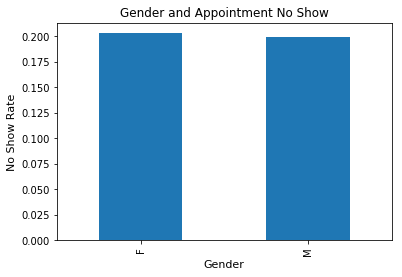

In [142]:
df.groupby('gender')['no_show'].mean().plot(kind ='bar', title ='Gender and Appointment No Show')
plt.xlabel('Gender', fontsize=11)
plt.ylabel('No Show Rate', fontsize=11);

There are no significant different in rate of keeping medical appointment when comparing different genders. 

### Research Question 2: Does ages has any effects on keeping medical appointment?

In [143]:
df.age.mean()

37.088874211731067

In [144]:
# Assign ages into four different groups
bin_edges = [-1, 12, 30, 50,115]
bin_names = ['child_age', 'young_age', 'middle_age', 'senior_age']

In [145]:
# Create new a column for the age group
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)
df.head()

,gender,age,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,62,1,0,0,0,0,0,senior_age
1,M,56,0,0,0,0,0,0,senior_age
2,F,62,0,0,0,0,0,0,senior_age
3,F,8,0,0,0,0,0,0,child_age
4,F,56,1,1,0,0,0,0,senior_age


In [146]:
df.groupby('age_group')['no_show'].mean()

age_group
child_age     0.204744
young_age     0.251393
middle_age    0.207044
senior_age    0.161675
Name: no_show, dtype: float64

Text(0,0.5,'No Show Rate')

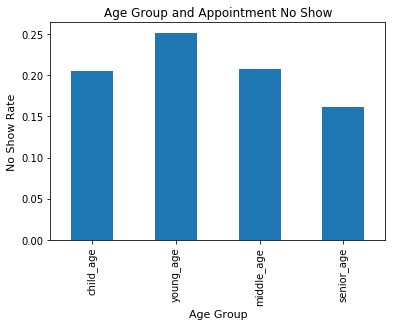

In [147]:
df.groupby('age_group')['no_show'].mean().plot(kind ='bar', title ='Age Group and Appointment No Show')
plt.xlabel('Age Group', fontsize=11)
plt.ylabel('No Show Rate', fontsize=11)

Patient at the age between 12 to 30 is more likely to miss their appoinment, while patients that at the age of 50 or older will be more likely to keep their appoinment. 

### Research Question 3: Would message reminder increase the chance of patient show up to their appointments?

In [148]:
# Check the effectiveness of message reminder by using mean
df.groupby('sms_received')['no_show'].mean()

sms_received
0    0.167033
1    0.275745
Name: no_show, dtype: float64

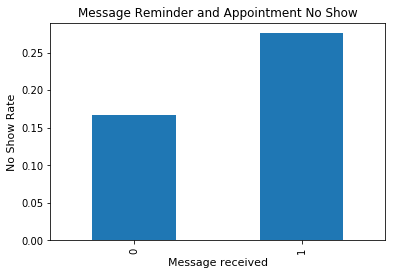

In [149]:
df.groupby('sms_received')['no_show'].mean().plot('bar', title ='Message Reminder and Appointment No Show')
plt.xlabel('Message received', fontsize=11)
plt.ylabel('No Show Rate', fontsize=11);

Message reminder did not increase the number of patients showing up for their appoinments.

<a id='conclusions'></a>
## Conclusions
>By analyzing appointment no-show based on patients’ age, gender and message reminder, the result has shown that:
<br>- Gender does not affect weather a patient would miss their appointment.
<br>- Patients at the age between 12 to 30 have higher chance of not showing up in their medical appointments, while patients who are at the age of 50 or older will be more likely to keep their appointments.
<br>- Although message reminder was thought to help increasing the appointment showed up rate, statistic showed that message reminder did not play a major role. 

#### Limitation
> <br> There are some outliner in age where is min age is -1 and the max age is 115


In [150]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0